<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day_16_Notes_SVM_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 16 Notes: Support Vector Machines
Fall 2022

In [ ]:
#import libraries
from google.colab import drive
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

#load data
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

Mounted at /content/drive


Scikit learn has a classifier for SVC:
- [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 

In [ ]:
#load up scikit-learn SVC (Support Vector Classifier)
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


accuracy: 0.9333333333333333
                   Pred Iris-setosa  Pred Iris-versicolor  Pred Iris-virginica
T Iris-setosa                     9                     0                    0
T Iris-versicolor                 0                    10                    1
T Iris-virginica                  0                     1                    9


In [ ]:
#Credit to Professor Eric Manley for this function
import pandas
#This code is based on the example here: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
#Parameters: the data set as a Pandas dataframe, the names of the predictors to put on the x and y axes,
#the name of the target column, and the classifier object to use

def plot_decision_boundary(data,x_name,y_name,target_name,clf):
    
    #list of the values appearing in the target column
    class_labels = data[target_name].unique()

    #converting from categorical target values to numbers so we can plot them with a contour plot
    target_col_nums = data[target_name].replace(to_replace=class_labels,value=range(len(data[target_name].unique())))

    #create a grid of points representing new cases that we need a prediction for
    #these will serve as the basis for drawing the contours
    x_points = numpy.linspace(data[x_name].min(), data[x_name].max(), 300)
    y_points = numpy.linspace(data[y_name].min(), data[y_name].max(), 300)
    X, Y = numpy.meshgrid(x_points,y_points)

    #train our classifier
    clf.fit(data[[x_name,y_name]],target_col_nums)

    #create the dataframe with all the points in our grid
    plot_points = pandas.DataFrame(list(product(x_points,y_points)), columns=[x_name,y_name])

    #get predictions for each point in our grid
    predictions = pandas.Series(clf.predict(plot_points))
    
    #predictions will be a big 1D array, so reshape them to 2-dimensions, same as the shape of the grid
    Z = predictions.values.reshape(X.shape)

    #draw the filled-in contours
    plt.contourf(X, Y, Z,cmap=plt.cm.coolwarm)

    #we will plot the training data using a scatter plot, so
    #need to grab the same number of colors used by contourf
    point_colors = plt.cm.coolwarm(numpy.linspace(0,1,len(class_labels)))

    #scatter plot each of the classes in our target column
    for curr_class in range(len(class_labels)):
        curr_subset = data[target_col_nums == curr_class]
        plt.scatter(curr_subset[x_name],curr_subset[y_name],color=point_colors[curr_class],edgecolors='k',label=class_labels[curr_class])
    
    #display the plot and accompanying info
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(str(clf)+'\ntraining set accuracy:'+str(clf.score(data[[x_name,y_name]],target_col_nums)))
    legend = plt.legend(loc='lower right')
    legend.get_frame().set_facecolor('silver')
    plt.show()


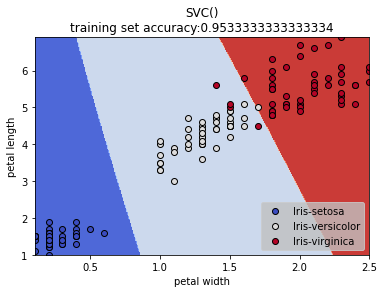

In [ ]:
#default SVC
plot_decision_boundary(data,'petal width','petal length','species',SVC())

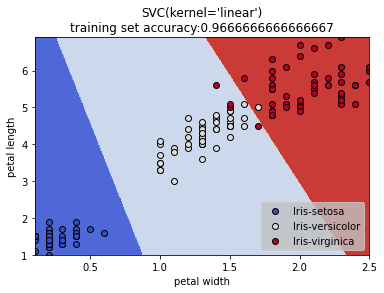

In [ ]:
#linear kernel
plot_decision_boundary(data,'petal width','petal length','species',SVC(kernel='linear'))

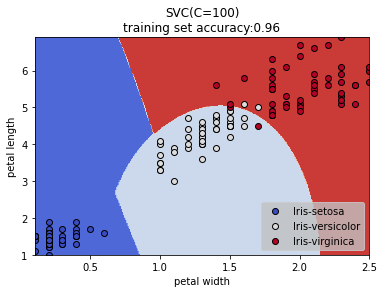

In [ ]:
#larger value for C
plot_decision_boundary(data,'petal width','petal length','species',SVC(C=100))

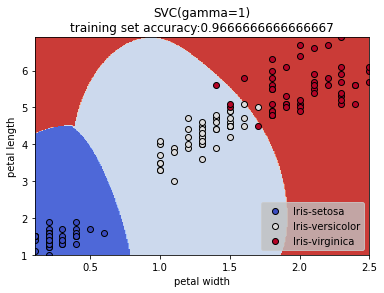

In [ ]:
# set gamma
plot_decision_boundary(data,'petal width','petal length','species',SVC(gamma=1))

# Exercise #1
[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 
- What are the parameters that we should consider tuning? Discuss.
- Play around with changing these parameters and plotting the decision boundary. 
- Are the results what you expect? Why or why not?
- Can you get 100% accuracy?


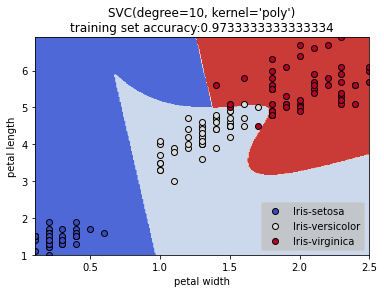

In [ ]:
# Exercise #1 code here
# kernel = 'poly'
plot_decision_boundary(data,'petal width','petal length','species',SVC(kernel='poly', degree= 10))

# Exercise #2
Try using the supplied code to experiment with how other algorithms will be mapped. Are the decision boundaries what you expect?
- KNN
- Decision Trees
- Random Forests


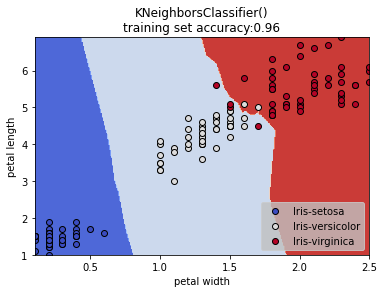

In [ ]:
# Exercise #2 code here
from sklearn import neighbors
neigh = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = "uniform")
plot_decision_boundary(data,'petal width','petal length','species',neigh)

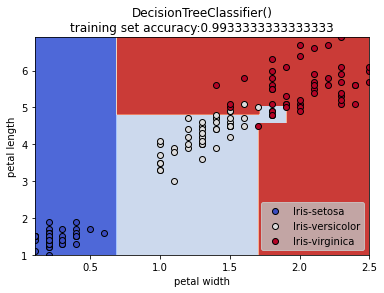

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
plot_decision_boundary(data,'petal width','petal length','species',dt)

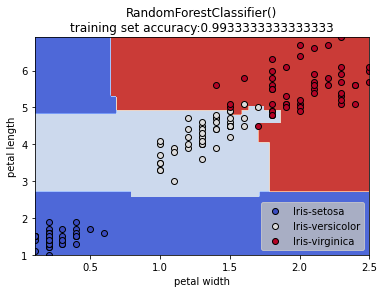

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
plot_decision_boundary(data,'petal width','petal length','species',forest)